In [59]:
# load required libraries
import keras
import numpy as np
import matplotlib.pyplot as plt

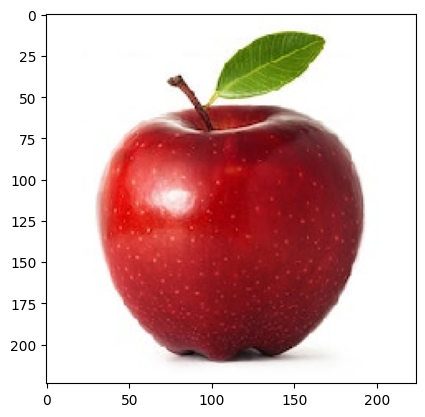

In [60]:
# load sample image file
img_file = "sample-image.jpg"
img = keras.utils.load_img(img_file, target_size=(224,224))
plt.imshow(img)

In [61]:
# convert image to numpy array
img = keras.utils.img_to_array(img)
img.shape

(224, 224, 3)

In [62]:
# build a basic model
from keras import layers

model = keras.Sequential([
    keras.Input(shape=(224,224,3)),
    layers.Conv2D(64, 3, activation='relu', name='layer1'),
    layers.MaxPooling2D(3, name='layer2'),
    layers.Conv2D(64, 3, activation='relu', name='layer3'),
    layers.MaxPooling2D(3, name='layer4')
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer1 (Conv2D)                      │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (MaxPooling2D)                │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer3 (Conv2D)                      │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer4 (MaxPooling2D)                │ (None, 24, 24, 64)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,720 (151.25 KB)

 Trainable params: 38,720 (151.25 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# extract features from any intermediate layer
model_features = keras.Model(inputs=model.inputs, outputs=model.get_layer('layer3').output)

In [65]:
# run feature extractor on sample image
features = model_features.predict(np.array([img]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


In [66]:
features.shape

(1, 72, 72, 64)

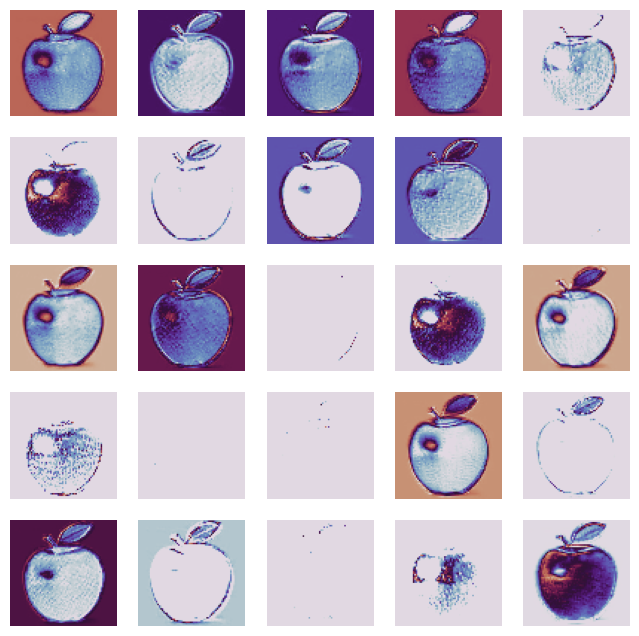

In [67]:
# plot image features

plt.figure(figsize=(8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(features[0,:,:,i], cmap='twilight')
  plt.axis('off')